# Customer Churn Prediction for a Telecommunication Company

## Data Collection & Cleaning

In [27]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.shape

(7043, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [32]:
mean_value = data['TotalCharges'].mean()
print(mean_value)

2283.3004408418656


In [34]:
data['TotalCharges'].fillna(mean_value)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [36]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

## Exploratory Data Analysis (EDA)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

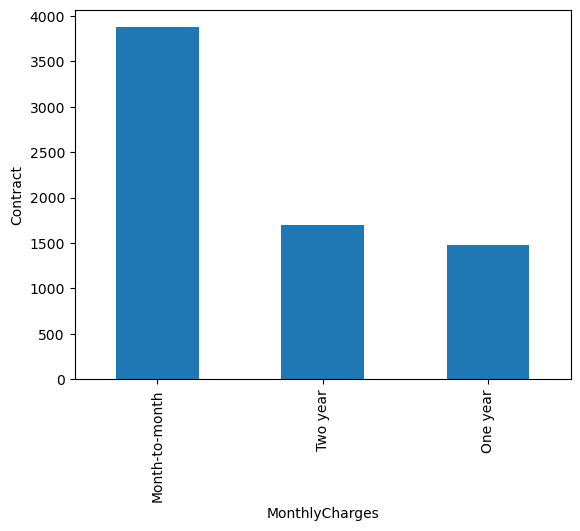

In [17]:
data['Contract'].value_counts().plot(kind='bar')

plt.xlabel("MonthlyCharges")
plt.ylabel("Contract")
#plt.title("Bar Graph of column_name")
plt.show()


In [13]:
#data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Text(0.5, 1.0, 'Customer Churn Distribution')

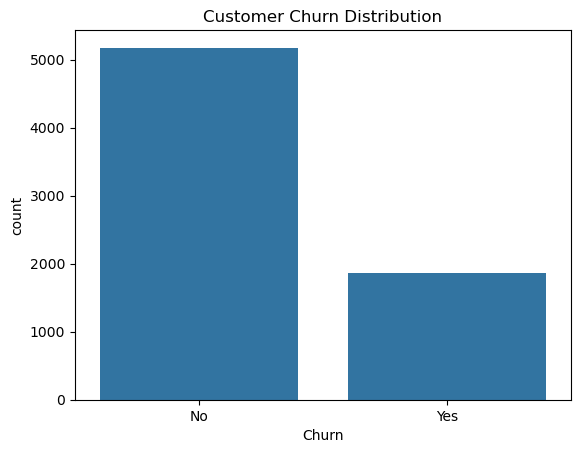

In [20]:
sns.countplot(x='Churn', data=data)
plt.title("Customer Churn Distribution")


Text(0.5, 1.0, 'Churn by Gender')

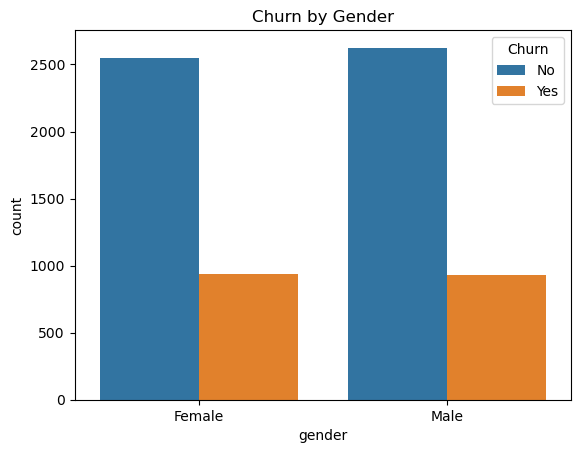

In [22]:
sns.countplot(x='gender', hue='Churn', data=data)
plt.title("Churn by Gender")

Text(0.5, 1.0, 'Churn by Contract Type')

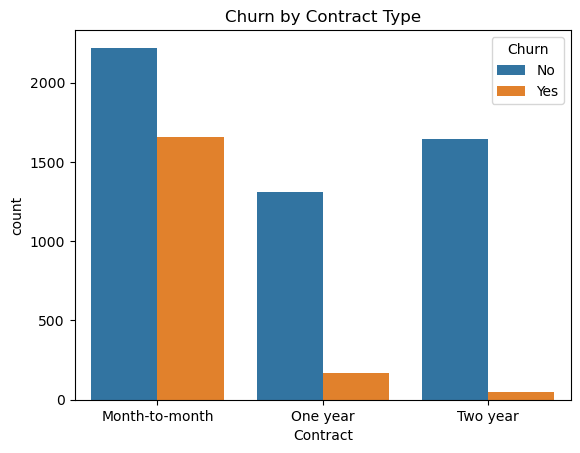

In [23]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title("Churn by Contract Type")

Text(0.5, 1.0, 'Tenure vs Churn')

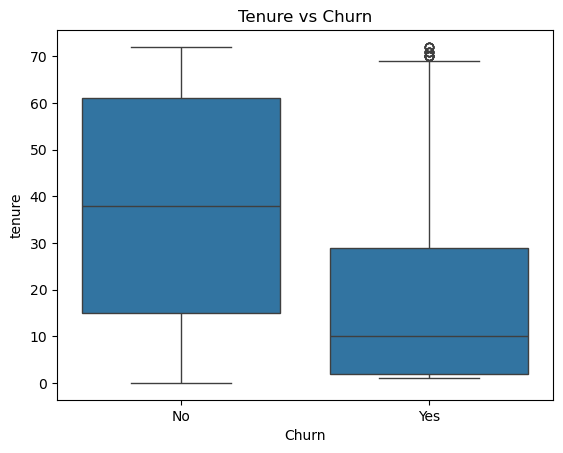

In [24]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title("Tenure vs Churn")


Text(0.5, 1.0, 'Monthly Charges Distribution by Churn')

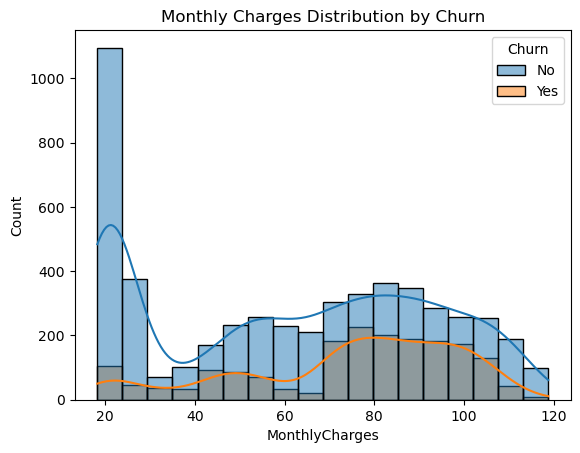

In [25]:
sns.histplot(x='MonthlyCharges', hue='Churn', data=data, kde=True)
plt.title("Monthly Charges Distribution by Churn")


<Axes: >

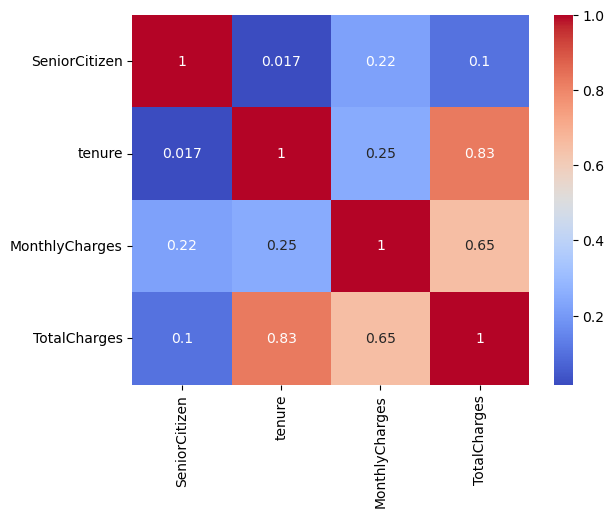

In [26]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')

### Goal of EDA: 
Identify patterns like

High charges → high churn

Low tenure → high churn

Month-to-month contract → high churn

In [39]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group', 'TotalServices'],
      dtype='object')

## Feature Engineering

In [38]:
# tenure group
data['tenure_group'] = pd.cut(data['tenure'], bins=[0,12,24,48,72], labels=['0-12','13-24','25-48','49-72'])

# Total services count
services = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in services:
    data[col] = data[col].replace({'Yes':1, 'No':0, 'No internet service':0})
data['TotalServices'] = data[services].sum(axis=1)

# Encode target variable
data['Churn'] = data['Churn'].map({'Yes':1, 'No':0})


C:\Users\freel\AppData\Local\Temp\ipykernel_18920\3935089014.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'Yes':1, 'No':0, 'No internet service':0})


In [44]:
X = pd.get_dummies(X, drop_first=True)

## Data Preprocessing

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])
# Split data
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [61]:
# Separate numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Scale only numerical columns
scaler = StandardScaler()
X_train_numerical = scaler.fit_transform(X_train[numerical_cols])
X_test_numerical = scaler.transform(X_test[numerical_cols])

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_numerical, columns=numerical_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_numerical, columns=numerical_cols, index=X_test.index)

# Add categorical columns back
X_train_scaled[categorical_cols] = X_train[categorical_cols]
X_test_scaled[categorical_cols] = X_test[categorical_cols]

Numerical columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'TotalServices']
Categorical columns: []


## Model building

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

In [67]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [73]:
# Train and evaluate
results = {}

In [69]:
accuracy = accuracy_score(y_test, y_pred)

In [70]:
precision = precision_score(y_test, y_pred)

In [71]:
recall = recall_score(y_test, y_pred)

In [ ]:
auc = roc_auc_score(y_test, y_pred)

In [72]:
      results[name] = [accuracy, precision, recall, auc]
    
# Display results
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'AUC']).T
print(results_df)


                     Accuracy  Precision    Recall       AUC
Logistic Regression  0.794890   0.631579  0.545455  0.715239
Decision Tree        0.716111   0.468900  0.524064  0.654786
Random Forest        0.794180   0.640940  0.510695  0.703657
Gradient Boosting    0.794180   0.640940  0.510695  0.703511


## Model Performance Comparison

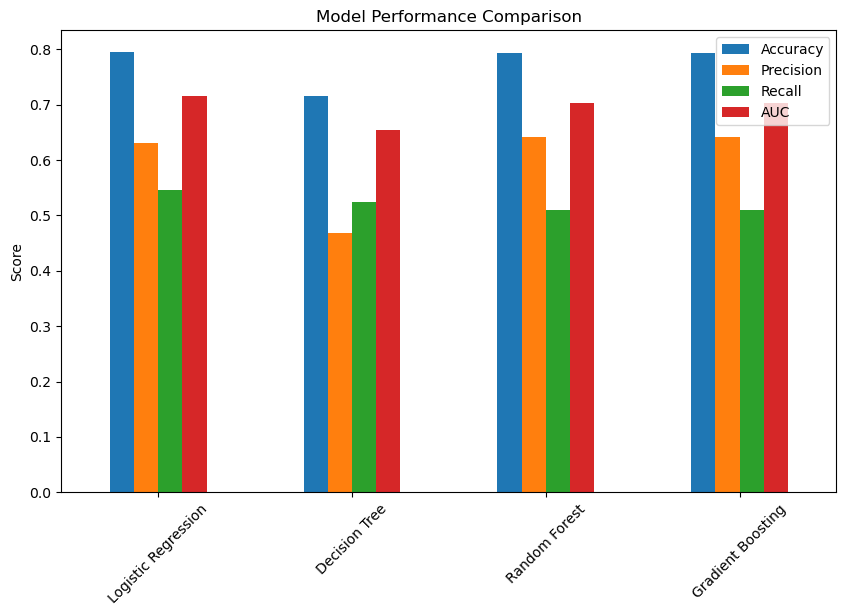

In [74]:
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [65]:
# evaluating best model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409

[[928 107]
 [183 191]]


## Outcomes

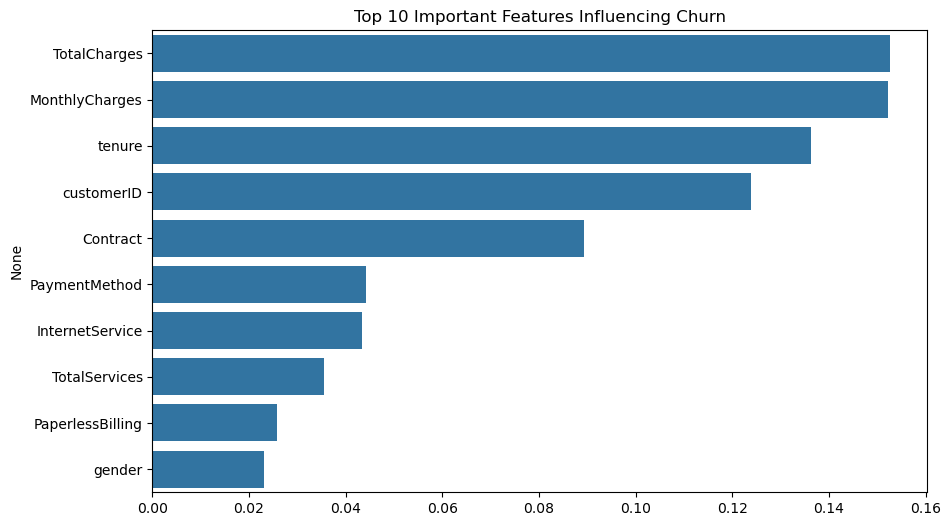

In [75]:
#Find which features most influence churn.
importances = pd.Series(best_model.feature_importances_, index=X_train_scaled.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features Influencing Churn")
plt.show()


## Final Insights and Recommendations

Based on analysis and model predictions, the following recommendations can help reduce churn:

Offer discounts or loyalty rewards to customers with high monthly bills.

Encourage customers to switch from month-to-month to long-term contracts.

Improve customer support services, especially tech support.

Send personalized offers to customers with short tenure to increase retention.